In [2]:
import pandas as pd

occupation = pd.read_csv("C:\\Users\\aleks\\Desktop\\efektywnyPython\\lab1\\ocupation.csv", sep = "|")

In [3]:
print(occupation)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [4]:
occupation.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [5]:
occupation.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [6]:
print("Liczba obserwacji: ", occupation.shape[0])
print("Liczba kolumn: ", occupation.shape[1])

Liczba obserwacji:  943
Liczba kolumn:  5


In [7]:
print(occupation.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


In [8]:
occupation['occupation'].nunique()


21

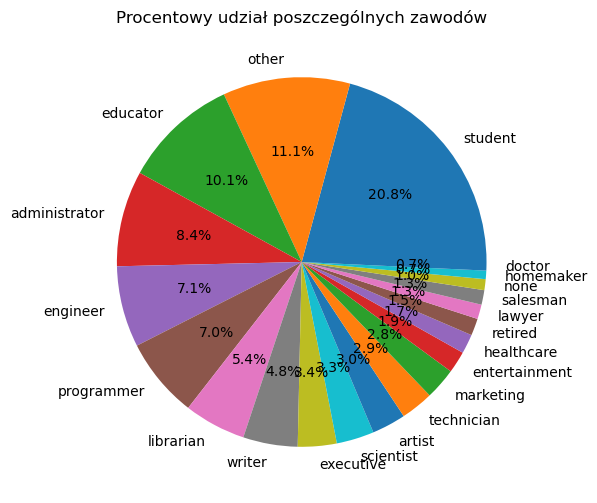

In [9]:
import matplotlib.pyplot as plt

occupation_counts = occupation['occupation'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.title('Procentowy udział poszczególnych zawodów')
plt.show()

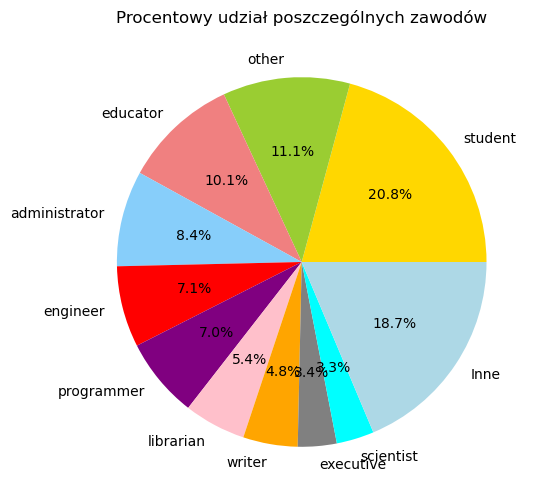

In [10]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'purple', 'pink', 'orange', 'gray', 'cyan', "lightblue"]

top_10_occupations = occupation_counts[:10]
other_occupations = occupation_counts[10:].sum()
top_10_with_other = top_10_occupations.append(pd.Series([other_occupations], index=['Inne']))
plt.figure(figsize=(10, 6))
plt.pie(top_10_with_other, labels=top_10_with_other.index, autopct='%1.1f%%', colors=colors)
plt.title('Procentowy udział poszczególnych zawodów')
plt.show()

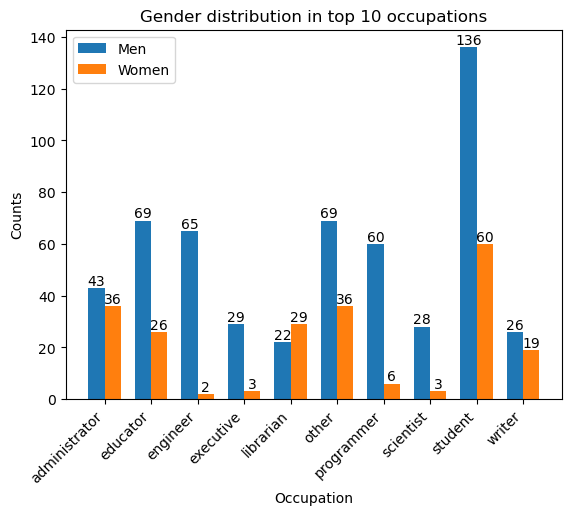

In [11]:
import numpy as np


top_occupations = occupation['occupation'].value_counts().index[:10]

top_occ = occupation[occupation['occupation'].isin(top_occupations)]

gender_counts = top_occ.groupby(['occupation', 'gender']).size().unstack().fillna(0)

bar_width = 0.35
index = np.arange(len(top_occupations))

fig, ax = plt.subplots()

bar1 = ax.bar(index, gender_counts['M'], bar_width, label='Men')
bar2 = ax.bar(index + bar_width, gender_counts['F'], bar_width, label='Women')

ax.set_xlabel('Occupation')
ax.set_ylabel('Counts')
ax.set_title('Gender distribution in top 10 occupations')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(gender_counts.index, rotation = 45, ha='right')
ax.legend()

for rect in bar1 + bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')


plt.show()


In [12]:
age = occupation.groupby('occupation')['age'].mean()


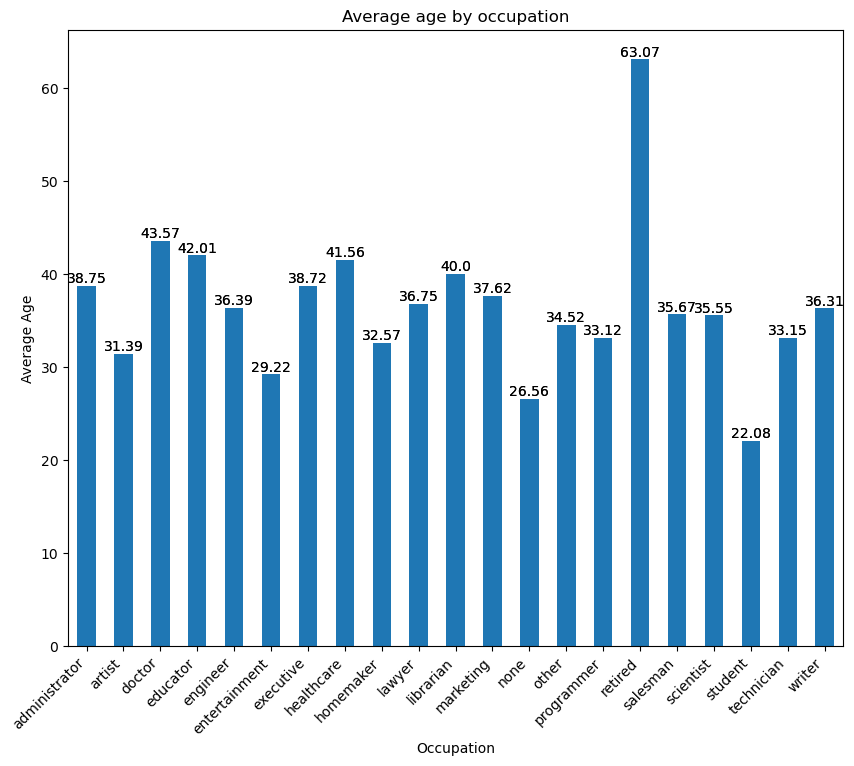

In [13]:
fig, ax = plt.subplots(figsize=(10, 8)) 
bars = age.plot(kind='bar', ax=ax)

age.plot(kind='bar', ax=ax) 

ax.set_xlabel('Occupation')
ax.set_ylabel('Average Age')
ax.set_title('Average age by occupation')

plt.xticks(rotation=45, ha='right')
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), fontsize=10, ha='center', va='bottom')

plt.show()

posx and posy should be finite values
posx and posy should be finite values


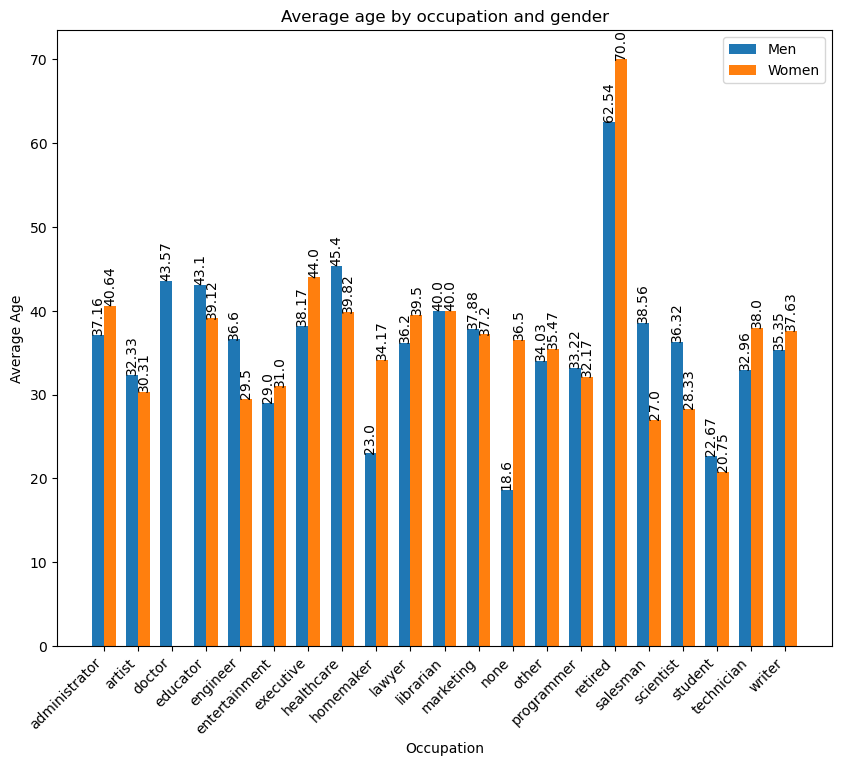

In [14]:
gender_age = occupation.groupby(['occupation', 'gender'])['age'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 8)) 
bar_width = 0.35
index = np.arange(len(gender_age.index))

bar1 = ax.bar(index, gender_age['M'], bar_width, label='Men')
bar2 = ax.bar(index + bar_width, gender_age['F'], bar_width, label='Women')

ax.set_xlabel('Occupation')
ax.set_ylabel('Average Age')
ax.set_title('Average age by occupation and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(gender_age.index, rotation=45, ha='right') 
ax.legend()

for bar in bar1 + bar2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
            fontsize=10, ha='center', va='bottom', rotation=90)

plt.show()